In [42]:
%load_ext autoreload
%autoreload 2

from Operators.genetic_algorithm import *
from Operators.plots import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
   # Define the parameter grid
param_grid = {
        "POP_SIZE": [100],
        # "max_gen": [50, 100],
        "mut_prob": [0.1],#, 0.3],
        "xo_prob":  [0.9],
        "mutation": [single_player_swap_2teams],
        "crossover": [crossover_swap_whole_position],
        "selection_algorithm": [roulette_selection, tournament_selection]}

In [35]:
#    # Define the parameter grid
# param_grid = {
#         "POP_SIZE": [50, 100],
#         # "max_gen": [50, 100],
#         "mut_prob": [0.1, 0.2],#, 0.3],
#         "xo_prob":  [0.9],
#         "mutation": [single_player_swap_2teams, single_player_shift_all_teams, full_position_swap_2teams],
#         "crossover": [crossover_swap_whole_position, crossover_swap_extreme_player],
#         "selection_algorithm": [roulette_selection, tournament_selection]}


In [36]:
fitness_dfs = run_grid_search(param_grid, n_runs=30, max_gen=100, filepath="Data/players(in).csv")

Grid Search Progress: 100%|██████████| 2/2 [14:08<00:00, 424.20s/config]


Summary saved to: ga_summary.csv


In [43]:
fitness_dfs.keys()

dict_keys(['POP=100 XO=0.9 MUT=0.1 single_player_swap_2teams/crossover_swap_whole_position'])

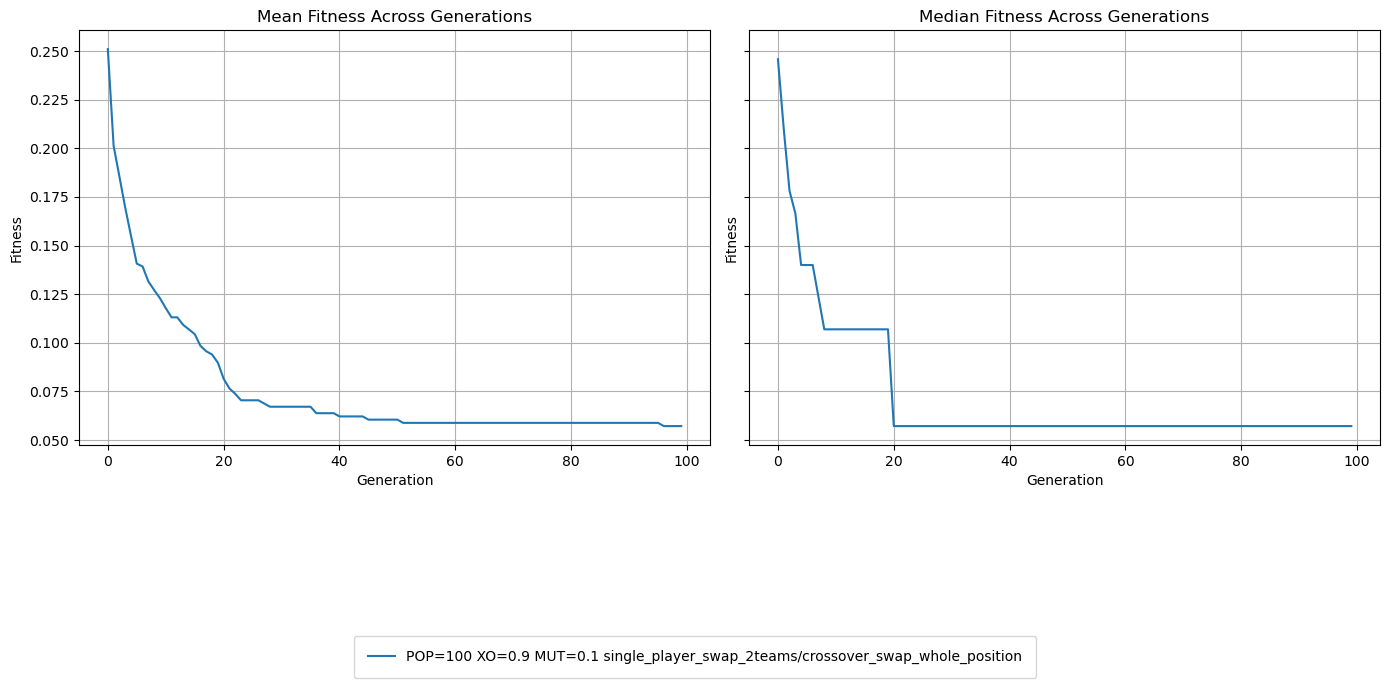

In [44]:
plot_fitness_over_gen(fitness_dfs)